# Statistics of AotM-2011 Dataset

In [1]:
%matplotlib inline
import os, sys
import json, gzip, codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data_dir = 'data/aotm-2011'

In [3]:
fname = os.path.join(data_dir, 'aotm2011_playlists.json.gz')
reader = codecs.getreader("utf-8")
with gzip.open(fname, 'r') as fd:
    playlists = json.load(reader(fd))

In [4]:
#playlists[0]

In [5]:
lengths = [len(playlists[j]['playlist']) for j in range(len(playlists))]

In [6]:
print('#Playlists:', len(lengths))

#Playlists: 101343


Histogram of playlist length.

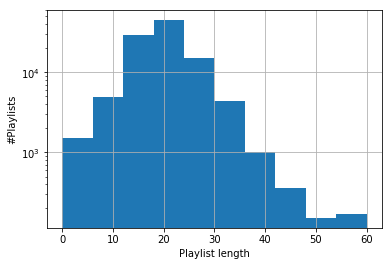

In [7]:
ax = plt.subplot(111)
pd.Series(lengths).hist(ax=ax)
ax.set_xlabel('Playlist length')
ax.set_ylabel('#Playlists')
ax.set_yscale('log')

Categories.

In [8]:
cats = [playlists[j]['category'] for j in range(len(playlists))]

In [9]:
print('#Categories:', np.unique(cats).shape[0])

#Categories: 43


In [10]:
counter = Counter(cats)

In [11]:
#counter

In [12]:
X = sorted([key for key in counter])
Y = [counter[key] for key in X]

Scatter plot of the number of playlists for all categories.

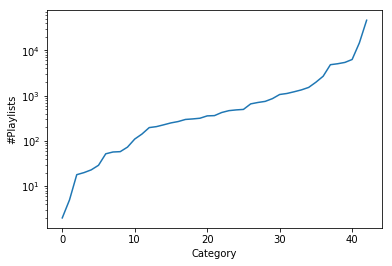

In [14]:
ax = plt.subplot(111)
#ax.set_xlabel('Category (ID)')
ax.set_xlabel('Category')
ax.set_ylabel('#Playlists')
ax.set_yscale('log')
#ax.plot(Y)
ax.plot(sorted(Y))

Playlists in which all tracks are in MSD.

In [15]:
subset_ix = [j for j in range(len(playlists)) \
             if len(playlists[j]['playlist']) == len([x for y in playlists[j]['filtered_lists'] for x in y])]

In [30]:
len(subset_ix)

471

In [42]:
subsubset_ix = [ix for ix in subset_ix if len(playlists[ix]['playlist']) > 1]

In [44]:
len(subsubset_ix)

241

In [41]:
playlists[subset_ix[10]]

{'category': 'Mixed Genre',
 'filtered_lists': [['SOKFLTD12A8C142D54',
   'SOCURKJ12AB018AFC4',
   'SOTLXNN12A58A7DC7E',
   'SONCQKA12A6D4F825E',
   'SOIPCGZ12A8C13C805',
   'SOXFKPE12A8C1319D6',
   'SOPMVTW12AF72A720A',
   'SOQXLRP12D021B3FF9',
   'SOFLURK12A8C130037',
   'SOXOURR12AB0186379']],
 'mix_id': 15263,
 'playlist': [[['Metallica', 'Of Wolf And Man'], 'SOKFLTD12A8C142D54'],
  [['Disturbed', 'Voices'], 'SOCURKJ12AB018AFC4'],
  [['Stabbing Westward', 'How Can I Hold On'], 'SOTLXNN12A58A7DC7E'],
  [['Metallica', 'Damage Inc.'], 'SONCQKA12A6D4F825E'],
  [['Disturbed', 'Down with the sickness'], 'SOIPCGZ12A8C13C805'],
  [['Stabbing Westward', 'Shame'], 'SOXFKPE12A8C1319D6'],
  [['Rage Against The Machine', 'Wake Up'], 'SOPMVTW12AF72A720A'],
  [['Pantera', 'Cowboys From Hell'], 'SOQXLRP12D021B3FF9'],
  [['Stabbing Westward', 'The Thing I hate'], 'SOFLURK12A8C130037'],
  [['Godsmack', 'Awake'], 'SOXOURR12AB0186379']],
 'timestamp': '2001-09-01T00:22:00',
 'user': {'member_since': '

In [45]:
playlists_subset = [playlists[ix] for ix in subsubset_ix]

In [48]:
len(playlists_subset)

241

In [49]:
import pickle as pkl

In [50]:
pkl.dump(playlists_subset, open('data/aotm-2011-subset.pkl', 'wb'))

### Check multiple ground truth

Assume query is:
- `query = (start_song)`
- `query = (start_song, length)`
- `query = (start_song, length, user)`

In [18]:
query_dict0 = dict()
query_dict1 = dict()
query_dict2 = dict()

In [19]:
for ix in range(len(playlists)):
    playlist = playlists[ix]['playlist']
    if len(playlist) == 0: continue
    
    track0_name = str.upper(playlist[0][0][1])
    user_name = str.upper(playlists[ix]['user']['name'])
    ntracks = len(playlists[ix]['playlist'])
    
    q0 = track0_name
    q1 = (track0_name, ntracks)
    q2 = (track0_name, ntracks, user_name)
    try:
        query_dict0[q0].append(ix)
    except KeyError:
        query_dict0[q0] = [ix]
    try:
        query_dict1[q1].append(ix)
    except KeyError:
        query_dict1[q1] = [ix]
    try:
        query_dict2[q2].append(ix)
    except KeyError:
        query_dict2[q2] = [ix]

In [21]:
#query_dict0

In [22]:
#query_dict1

In [23]:
#query_dict2

queries with multiple ground truths.

In [24]:
queries0 = sorted([q0 for q0 in query_dict0 if len(query_dict0[q0]) > 1])

In [25]:
print('query = start_song')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries0), len(query_dict0), 100*len(queries0) / len(query_dict0)))

query = start_song
Queries with multiple ground truth: 14280/57719, ratio: 24.74%


In [26]:
queries1 = sorted([q1 for q1 in query_dict1 if len(query_dict1[q1]) > 1])

In [27]:
print('query = (start_song, length)')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries1), len(query_dict1), 100*len(queries1) / len(query_dict1)))

query = (start_song, length)
Queries with multiple ground truth: 7390/90828, ratio: 8.14%


In [28]:
queries2 = sorted([q2 for q2 in query_dict2 if len(query_dict2[q2]) > 1])

In [29]:
print('query = (start_song, length, user)')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries2), len(query_dict2), 100*len(queries2) / len(query_dict2)))

query = (start_song, length, user)
Queries with multiple ground truth: 933/100128, ratio: 0.93%
